In [1]:
import pandas as pd 
from datetime import datetime

# Données 
Les données récupérés le sont de bixi, (https://bixi.com/fr/donnees-ouvertes)[https://bixi.com/fr/donnees-ouvertes]
et de l'API Oikolab. 

In [2]:
deplacement = pd.read_csv('transfo-data/2021-rawdata.csv')
deplacement

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member
0,2021-05-21 17:21:44.934,10,2021-05-21 18:07:58.699,10,2773,1
1,2021-06-12 14:45:02.959,10,2021-06-12 15:11:14.937,187,1571,0
2,2021-08-27 08:19:17.396,10,2021-08-27 08:29:04.477,506,587,1
3,2021-06-11 19:07:28.724,10,2021-06-11 19:50:30.214,10,2581,0
4,2021-05-25 07:19:29.669,10,2021-05-25 07:47:42.001,423,1692,1
...,...,...,...,...,...,...
5490038,2021-11-11 14:55:04.039,1140,2021-11-11 14:59:41.446,1140,277,0
5490039,2021-11-13 16:56:22.412,1140,2021-11-13 17:28:59.982,1140,1957,1
5490040,2021-11-11 18:41:06.111,1140,2021-11-11 18:48:18.115,928,432,1
5490041,2021-11-10 18:17:49.654,1140,2021-11-10 18:24:40.643,928,410,1


In [3]:
deplacement.start_date = deplacement.start_date.apply(lambda x: x.split(" ")[0])
deplacement


,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member
0,2021-05-21,10,2021-05-21 18:07:58.699,10,2773,1
1,2021-06-12,10,2021-06-12 15:11:14.937,187,1571,0
2,2021-08-27,10,2021-08-27 08:29:04.477,506,587,1
3,2021-06-11,10,2021-06-11 19:50:30.214,10,2581,0
4,2021-05-25,10,2021-05-25 07:47:42.001,423,1692,1
...,...,...,...,...,...,...
5490038,2021-11-11,1140,2021-11-11 14:59:41.446,1140,277,0
5490039,2021-11-13,1140,2021-11-13 17:28:59.982,1140,1957,1
5490040,2021-11-11,1140,2021-11-11 18:48:18.115,928,432,1
5490041,2021-11-10,1140,2021-11-10 18:24:40.643,928,410,1


In [4]:
deplacement_par_jour = deplacement.groupby("start_date").count()
deplacement_par_jour.sort_values(by=["start_date"], inplace=True)
deplacement_par_jour.drop(deplacement_par_jour.columns.difference(["start_date","emplacement_pk_start"]),1,inplace=True)
deplacement_par_jour.reset_index(inplace=True)
deplacement_par_jour.rename({"emplacement_pk_start":"nb"},inplace=True,errors="raise",axis="columns")


/tmp/ipykernel_127888/2638020246.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  deplacement_par_jour.drop(deplacement_par_jour.columns.difference(["start_date","emplacement_pk_start"]),1,inplace=True)


<AxesSubplot:xlabel='start_date'>

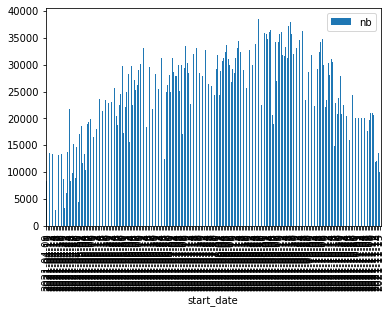

In [5]:
import matplotlib.pyplot as plt 
#non lisible à refaire
plt.rcParams["figure.figsize"] = (20, 4)
deplacement_par_jour.plot(x="start_date",y="nb",kind="bar")

In [6]:
date_debut, date_fin= deplacement_par_jour['start_date'][0],deplacement_par_jour['start_date'][len(deplacement_par_jour)-1]
date_debut, date_fin

('2021-04-09', '2021-11-15')

In [7]:
import requests

r = requests.get('https://api.oikolab.com/weather',
                 params={'param': ['temperature','wind_speed','total_precipitation'],
                         'start': date_debut,
                         'end': date_fin,
                         'lat': 43.6529,
                         'lon': -79.3849,
                         'freq':'D',
                         'api-key': '9bcc801713754ea5afb3a7aad60e263f'}
                 )
#svp ne pas réutiliser l'apikey qui est la mienne
import json
import pandas as pd

weather_data = json.loads(r.json()['data'])
df = pd.DataFrame(index=pd.to_datetime(weather_data['index'],
                                       unit='s'),
                  data=weather_data['data'],
                  columns=weather_data['columns'])
df

,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),wind_speed (m/s),total_precipitation (mm of water equivalent)
2021-04-09,"(43.6529, -79.3849)",era5,127.15,-5.0,10.68,4.25,0.11
2021-04-10,"(43.6529, -79.3849)",era5,127.15,-5.0,10.12,3.52,0.00
2021-04-11,"(43.6529, -79.3849)",era5,127.15,-5.0,9.83,4.33,0.92
2021-04-12,"(43.6529, -79.3849)",era5,127.15,-5.0,7.28,4.47,0.27
2021-04-13,"(43.6529, -79.3849)",era5,127.15,-5.0,6.45,2.21,0.01
...,...,...,...,...,...,...,...
2021-11-11,"(43.6529, -79.3849)",era5,127.15,-5.0,9.23,5.79,0.04
2021-11-12,"(43.6529, -79.3849)",era5,127.15,-5.0,11.15,6.18,0.19
2021-11-13,"(43.6529, -79.3849)",era5,127.15,-5.0,6.16,6.12,0.05
2021-11-14,"(43.6529, -79.3849)",era5,127.15,-5.0,4.15,6.21,0.21


In [8]:
df2 = df.drop(columns=["model (name)", "coordinates (lat,lon)","utc_offset (hrs)","model elevation (surface)"])
df2.rename({"temperature (degC)":"temp", "wind_speed (m/s)":"wind", "total_precipitation (mm of water equivalent)":"rain"},errors="raise",axis='columns',inplace=True)
df2.index.name = "date"
df2.reset_index(inplace=True)
df2.head()

,date,temp,wind,rain
0,2021-04-09,10.68,4.25,0.11
1,2021-04-10,10.12,3.52,0.00
2,2021-04-11,9.83,4.33,0.92
3,2021-04-12,7.28,4.47,0.27
4,2021-04-13,6.45,2.21,0.01


In [9]:
type(deplacement_par_jour["start_date"][0]), type(df2["date"][0])

(str, pandas._libs.tslibs.timestamps.Timestamp)

In [10]:
deplacement_par_jour["start_date"] = pd.to_datetime(deplacement_par_jour["start_date"])

In [11]:
start = deplacement_par_jour.merge(df2, left_on="start_date", right_on="date")
start.drop(columns="start_date",inplace=True)
#deplacement_par_jour.plot(x="start_date",y="nb",kind="bar")


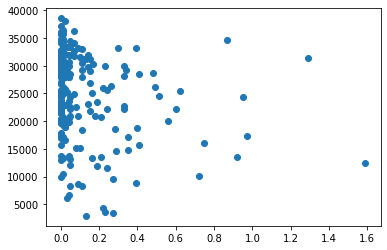

In [12]:
data = {"nb" : start["nb"],
        "rain": start["rain"]}
plt.scatter("rain","nb",data=data)

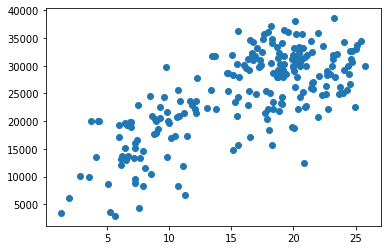

In [13]:
data = {"nb" : start["nb"],
        "temp": start["temp"]}
plt.scatter("temp","nb",data=data)

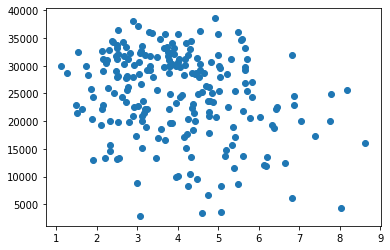

In [14]:
data = {"nb" : start["nb"],
        "wind": start["wind"]}
plt.scatter("wind","nb",data=data)

On peux émettre une première hypothèse que le nombre de déplacement est fortement corrélés à la pluie et à la température.

deplacement.start_date = deplacement.start_date.apply(lambda x: x.split(" ")[0])

In [20]:
start["date"].apply(lambda x:x.weekday())
start['Day of Week'] = start['date'].dt.day_name()

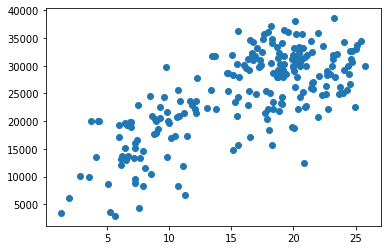

In [21]:
data = {"nb" : start["nb"],
        "temp": start["temp"]}
plt.scatter("temp","nb",data=data)

In [22]:
colors = {'Monday':"blue","Tuesday":"green","Wednesday":"green","Friday":"red","Thursday":"red","Sunday":"yellow","Saturday":"orange"}

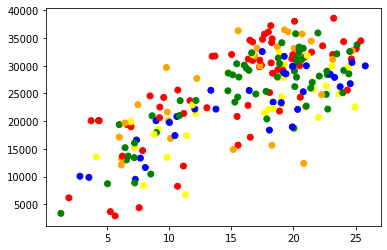

In [23]:
fig, ax = plt.subplots()
ax.scatter(start['temp'], start['nb'], c=start['Day of Week'].map(colors))

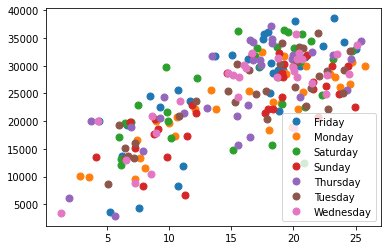

In [24]:

groups = start.groupby('Day of Week')
for name, group in groups:
    plt.plot(group.temp, group.nb, marker='o', linestyle='', markersize=7, label=name)

plt.legend()

In [25]:
start.head()

,nb,date,temp,wind,rain,Day of Week
0,8255,2021-04-09,10.68,4.25,0.11,Friday
1,16889,2021-04-10,10.12,3.52,0.00,Saturday
2,13475,2021-04-11,9.83,4.33,0.92,Sunday
3,9508,2021-04-12,7.28,4.47,0.27,Monday
4,13433,2021-04-13,6.45,2.21,0.01,Tuesday


In [26]:
start.to_csv('data/meteo_2021.csv',index=False)